# 베이지안 네트워크 모형

- A: 건강 상태

- B: 공부 시간

- C: 시험 성적

- 다수의 확률변수 중 특정한 소수의 확률변수들이 가지는 관계를 그래프로 표현한 것을 그래프 확률모형(graphical probability model)
    - 그래프 확률모형 중에서도 이렇게 인과관계가 확실하여 방향성 그래프로 표시할 수 있는 것을 베이지안 네트워크 모형

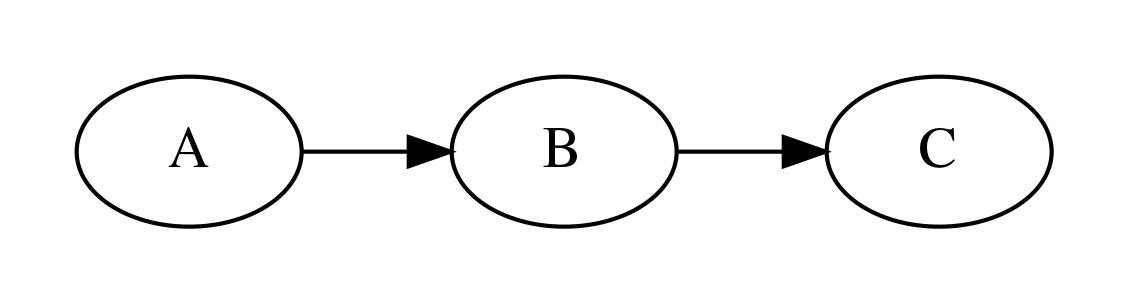

In [1]:
import networkx as nx
from IPython.core.display import Image

g1 = nx.DiGraph()
g1.add_path(['A','B','C'])

Image('./image/17.02 그래프 확률모형_4_0.png', width=600)

$$ P(A, B, C) = P(A)P(B|A)P(C|B) $$

원래는 $ P(A, B, C) = P(A)P(B|A)P(C|A,B) $ 이런 식인데,

$A$와 $C$가 $B$에 대해 조건부 독립이므로 (B노드, 머리-꼬리 결합)

$P(C|A,B) = P(C|B)$

-  변수간의 인과 관계라는 추가 정보로 인해 모수의 숫자가 26개에서 14개로 크게 감소

- P(A), P(B|A), P(C|B) 구하자


- 건강상태 나쁠(A=0)확률 0.1, 보통은 0.6, 좋음(A=2)은 0.3

In [3]:
from pgmpy.factors.discrete import JointProbabilityDistribution as jpd
from pgmpy.factors.discrete import TabularCPD

P_A = jpd(['A'], [3], np.array([0.1,0.6,0.3]))
print(P_A)

+------+--------+
| A    |   P(A) |
+======+========+
| A(0) | 0.1000 |
+------+--------+
| A(1) | 0.6000 |
+------+--------+
| A(2) | 0.3000 |
+------+--------+


In [5]:
P_A = TabularCPD('A', 3, np.array([0.1,0.6,0.3]).reshape(3,1))
print(P_A)

+------+-----+
| A(0) | 0.1 |
+------+-----+
| A(1) | 0.6 |
+------+-----+
| A(2) | 0.3 |
+------+-----+


- 건강 상태가 나쁘면(A=0), 공부시간이 적거나(B=0), 보통이거나(B=1), 많을(B=2) 확률은 각각 60%, 30%, 10%다.

- 건강 상태가 보통이면(A=1), 공부시간이 적거나(B=0), 보통이거나(B=1), 많을(B=2) 확률은 각각 20%, 60%, 20%다.

- 건강 상태가 좋으면(A=2), 공부시간이 적거나(B=0), 보통이거나(B=1), 많을(B=2) 확률은 각각 20%, 30%, 50%다.

In [6]:
P_B_I_A = TabularCPD('B', 3, np.array([[0.6,0.2,0.2],
                                      [0.3,0.6,0.3],
                                      [0.1,0.2,0.5]]), evidence=['A'], evidence_card=[3])
print(P_B_I_A)

+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.2  |
+------+------+------+------+
| B(1) | 0.3  | 0.6  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.2  | 0.5  |
+------+------+------+------+


- CPD객체는 marginalize 메서드로 특정 변수의 모든 겨우의 확률을 더하는 sum-out 가능

$$ P(B) = \sum_A P(A,B) = \sum_A P(B|A)P(A) $$

In [21]:
# 이건 P(A,B) 즉 결합분포
print(P_B_I_A * P_A)

+------+----------------------+------+------+
| A    | A(0)                 | A(1) | A(2) |
+------+----------------------+------+------+
| B(0) | 0.06                 | 0.12 | 0.06 |
+------+----------------------+------+------+
| B(1) | 0.03                 | 0.3  | 0.06 |
+------+----------------------+------+------+
| B(2) | 0.010000000000000002 | 0.18 | 0.18 |
+------+----------------------+------+------+


In [10]:
# 메서드 사용에 유의
# Marginalize OUT으로 접근
P_B = (P_B_I_A * P_A).marginalize(['A'], inplace=False)
print(P_B)

+------+------+
| B(0) | 0.24 |
+------+------+
| B(1) | 0.48 |
+------+------+
| B(2) | 0.28 |
+------+------+


- 공부시간이 적으면(B=0), 성적이 나쁘거나(C=0), 보통이거나(C=1), 좋을(C=2) 확률은 각각 80%, 10%, 10%이다.

- 공부시간이 보통이면(B=1), 성적이 나쁘거나(C=0), 보통이거나(C=1), 좋을(C=2) 확률은 각각 10%, 80%, 10%이다.

- 공부시간이 많으면(B=2), 성적이 나쁘거나(C=0), 보통이거나(C=1), 좋을(C=2) 확률은 각각 10%, 10%, 80%이다.

In [14]:
P_C_I_B = TabularCPD('C', 3, 
                    np.array([[0.8,0.1,0.1],
                             [0.1,0.8,0.1],
                             [0.1,0.1,0.8]]), evidence=['B'], evidence_card=[3])
print(P_C_I_B)

+------+------+------+------+
| B    | B(0) | B(1) | B(2) |
+------+------+------+------+
| C(0) | 0.8  | 0.1  | 0.1  |
+------+------+------+------+
| C(1) | 0.1  | 0.8  | 0.1  |
+------+------+------+------+
| C(2) | 0.1  | 0.1  | 0.8  |
+------+------+------+------+


- 마찬가지로 B를 marginalize 하여 C만 남김

In [15]:
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+-------+
| C(0) | 0.268 |
+------+-------+
| C(1) | 0.436 |
+------+-------+
| C(2) | 0.296 |
+------+-------+


이 조건부 확률들을 결합하여 하나의 베이지안 네트워크로 만들려면 BayesianModel 클래스를 사용한다. 생성자에는 노드를 연결한 그래프 정보를 넣고 add_cpds 메서드로 조건부확률을 추가할 수 있다.

In [16]:
from pgmpy.models import BayesianModel

# A->B, B-.C
model = BayesianModel([('A','B'), ('B','C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

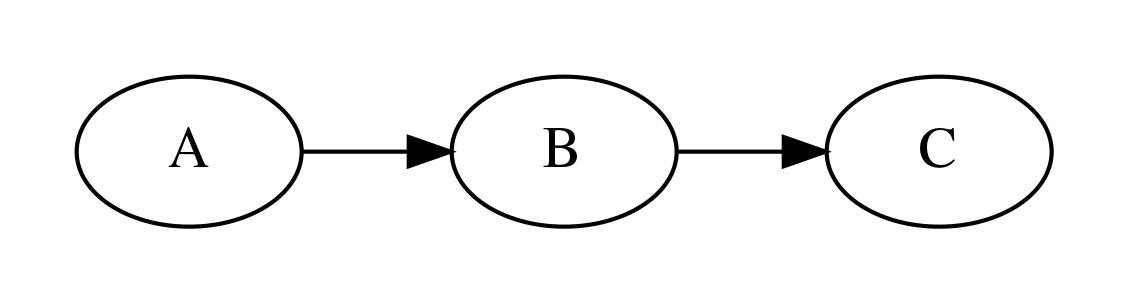

In [17]:
from IPython.core.display import Image
Image('./image/17.02 그래프 확률모형_21_0.png', width=600)

이렇게 만들어진 모형으로부터 여러가지 추론(inference)을 할 수 있다. 예를 들어 전체 결합확률분포 함수를 찾고 그 함수로부터 A, B, C의 marginal 확률분포를 계산하면 A, B, C의 값으로 어떤 값이 가장 확률이 높은지 알 수 있다. 분석 결과를 보면 시험 성적이 좋을 확률은 35.9%이다. 추론에 사용된 VariableElimination 클래스의 사용법에 대해서는 곧 학습한다.

In [44]:
from pgmpy.inference import VariableElimination

inference= VariableElimination(model)
result = inference.query(['C'])
print(result)


Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: B:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: A: 100%|██████████| 2/2 [00:00<00:00, 401.08it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2680 |
+------+----------+
| C(1) |   0.4360 |
+------+----------+
| C(2) |   0.2960 |
+------+----------+


- 아래의 결과는, 
    - C와 A는 B에 대해 조건부 독립이므로
    - A의 확률을 계산할 때 B가 주어졌다면, C는 필요가 없다.

In [47]:
resultA = inference.query(['A'], evidence={'B':0, 'C':2}, show_progress=False)
print(resultA)
resultB = inference.query(['A'], evidence={'B':0}, show_progress=False)
print(resultB)

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2500 |
+------+----------+
| A(1) |   0.5000 |
+------+----------+
| A(2) |   0.2500 |
+------+----------+
+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2500 |
+------+----------+
| A(1) |   0.5000 |
+------+----------+
| A(2) |   0.2500 |
+------+----------+


- 그냥 query() 인수 몇개 테스트

In [35]:
a = inference.query(['C'], evidence={'A':0}, joint=False, show_progress=False)
b = inference.query(['C'], evidence={'A':0}, show_progress=False)

In [42]:
print(a['C'])

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5200 |
+------+----------+
| C(1) |   0.3100 |
+------+----------+
| C(2) |   0.1700 |
+------+----------+


In [38]:
print(b)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5200 |
+------+----------+
| C(1) |   0.3100 |
+------+----------+
| C(2) |   0.1700 |
+------+----------+


# 베이지안 네트워크 결합확률분포

$$ P(X_1, \cdots, X_N) = \prod_{i=1}^N P(X_i | Pa(X_i))$$

In [29]:
g1 = nx.DiGraph()
g1.add_edge('X1','X3')
g1.add_edge("X1", "X4")
g1.add_edge("X3", "X4")
g1.add_edge("X2", "X4")
g1.add_edge("X2", "X7")
g1.add_edge("X4", "X5")
g1.add_edge("X4", "X6")

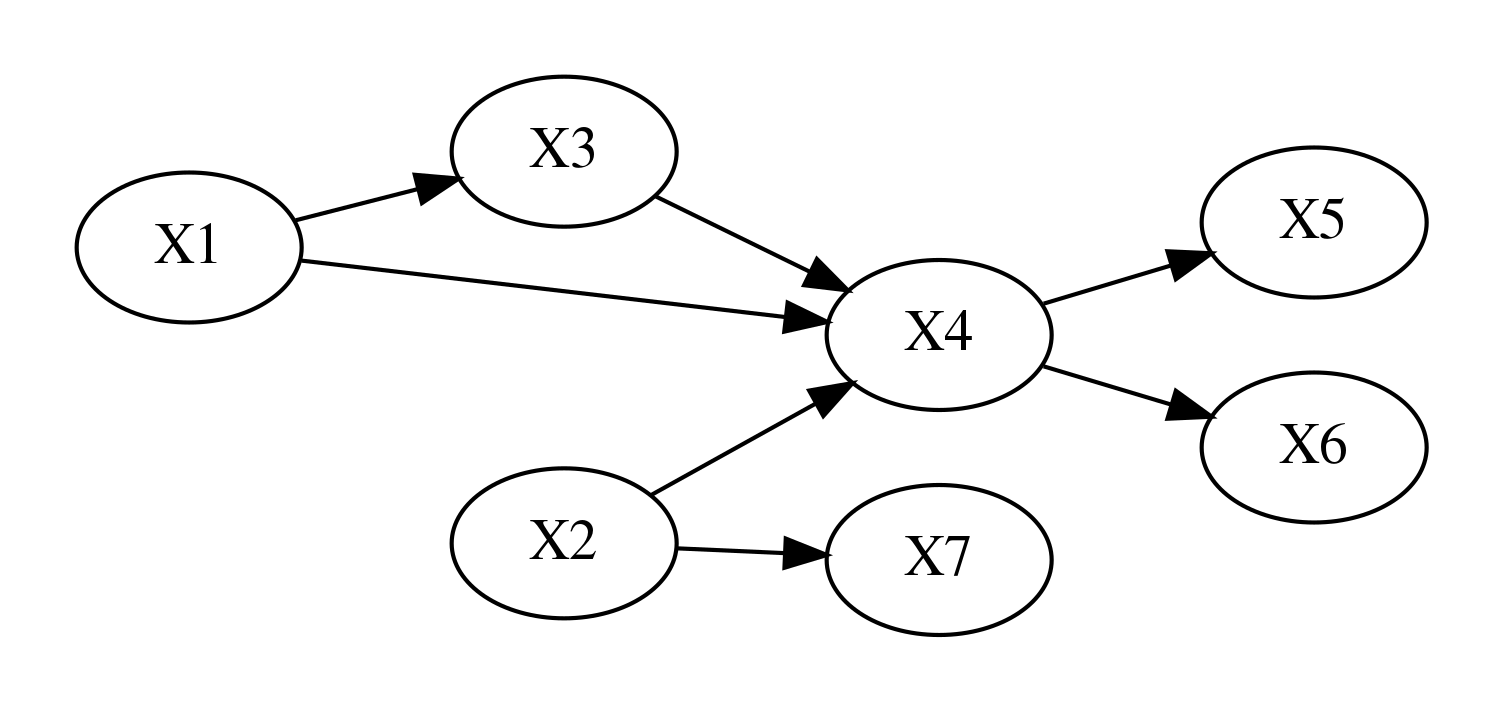

In [30]:
from IPython.core.display import Image
Image('./image/17.02 그래프 확률모형_26_0.png', width=600)

 $$ P(X_1, X_2, X_3, X_4, X_5, X_6, X_7) = P(X_1) P(X_2) P(X_3 | X_1) P(X_4| X_1, X_2, X_3) P(X_5|X_4) P(X_6|X_4) P(X_7|X_2) $$

# 조건부 독립

베이지안 네트워크를 만들 때 중요한 것은 확률변수간의 조건부 독립 관계가 그래프에 나타나고 있어야 한다는 점이다.

독립
$$ P(A, B) = P(A)P(B) $$

조건부독립
$$ P(A, B|C) = P(A|C) P(B|C) $$

$$ P(A|B,C) = P(A|C) $$
$$ P(B|A,C) = P(B|C) $$

## 방향성 분리

방향성 분리(d-separation, directed separation) 정리는 방향성 그래프 모형에서 어떤 두 노드(확률변수)가 조건부 독립인지 아닌지 알아보는 방법이다. 다음과 같은 세가지 간선 결합을 알아야 한다.

- 꼬리-꼬리 결합

- 머리-꼬리 결합

- 머리-머리 결합

### 꼬리꼬리

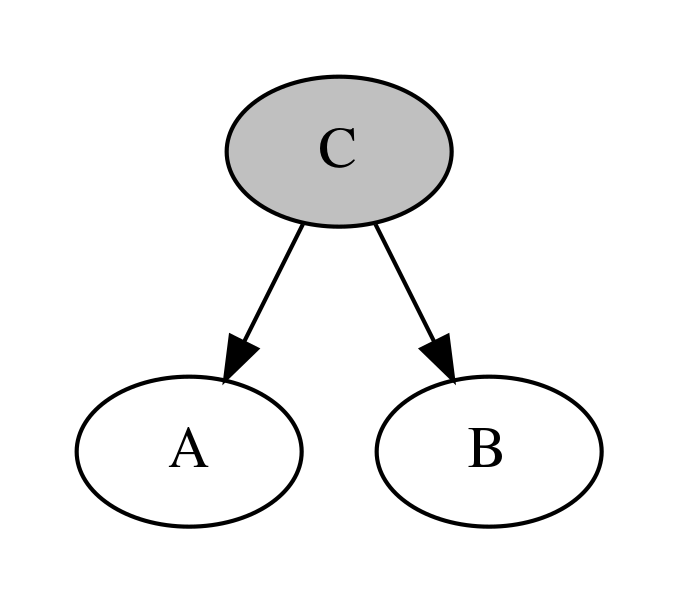

In [31]:
g2 = nx.DiGraph()
g2.add_path(['C','A'])
g2.add_path(['C','B'])

Image('./image/17.02 그래프 확률모형_36_0.png', width=600)

$$ P(A,B|C) = \dfrac{P(A, B, C)}{P(C)} = \dfrac{P(A|C)P(B|C)P(C)}{P(C)} = P(A|C)P(B|C) $$

### 머리꼬리

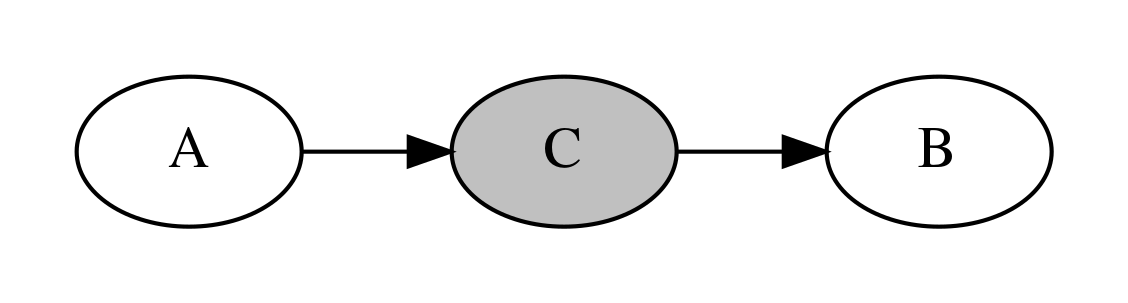

In [32]:
g3 = nx.DiGraph()
g3.add_path(['A','C','B'])

Image('./image/17.02 그래프 확률모형_40_0.png', width=600)

$$ P(A,B|C) = \dfrac{P(A, B, C)}{P(C)} = \dfrac{P(A)P(C|A)P(B|C)}{P(C)} = \dfrac{P(A,C)P(B|C)}{P(C)} = P(A|C)P(B|C) $$

### 머리머리

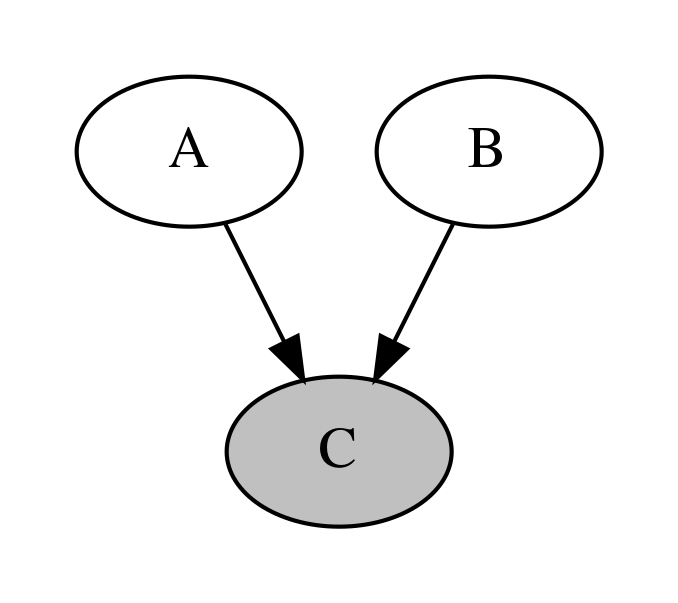

In [33]:
g4 = nx.DiGraph()
g4.add_path(['A','C'])
g4.add_path(['B','C'])

Image('./image/17.02 그래프 확률모형_44_0.png', width=600)

- 이 때는 조건부독립 성립 안함. C값 알고 있다면 A와 B가 종속관계

- A와 B가 C에 대해서 조건부 독립인 경우 다음 조건 만족
    - C가 A, B 사이의 경로에 있는 꼬리-꼬리 결합이거나 머리-꼬리 결합이다.

    - C가 A, B 사이의 경로상에 있는 머리-머리 결합이거나 혹은 이러한 노드의 자손이 아니어야 한다.

